# Robby Azwan Saputra
# 140810230008
# Horse or Human Classifier
Membangun model CNN untuk klasifikasi binary gambar kuda vs manusia.

In [1]:
import urllib.request
import zipfile
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [ ]:
data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
zip_ref = zipfile.ZipFile('horse-or-human.zip', 'r')
zip_ref.extractall('data/horse-or-human')

data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
zip_ref = zipfile.ZipFile('validation-horse-or-human.zip', 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [2]:
TRAINING_DIR = 'data/horse-or-human'
VALIDATION_DIR = 'data/validation-horse-or-human'

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # 💡 ini penting buat cegah overfitting
    tf.keras.layers.Dense(1, activation='sigmoid') # jangan ubah ini
])

c:\Users\Robby Azwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stop]
)


c:\Users\Robby Azwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 0.5463 - loss: 1.3973 - val_accuracy: 0.6992 - val_loss: 0.5140
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step - accuracy: 0.8084 - loss: 0.5152 - val_accuracy: 0.7969 - val_loss: 0.5810
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.8775 - loss: 0.3027 - val_accuracy: 0.7344 - val_loss: 0.8400
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.9025 - loss: 0.2534 - val_accuracy: 0.8477 - val_loss: 0.5513


Akurasi training: 91.14%
Akurasi validasi: 84.77%


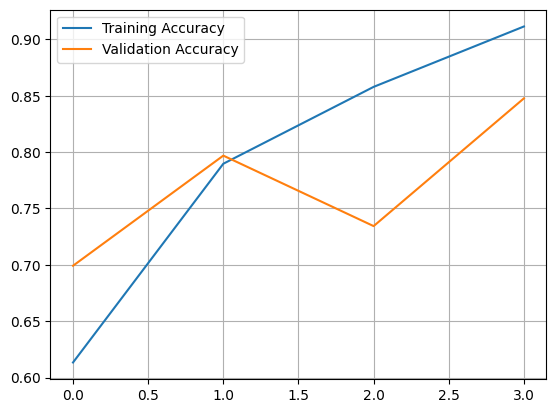

In [5]:
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Akurasi training: {acc*100:.2f}%")
print(f"Akurasi validasi: {val_acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [6]:
model.save("model_05.h5")